<a href="https://colab.research.google.com/github/MughalUsama/Brain-tumor-segmentation-FYP/blob/Segmentation/Segmentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive

In [ ]:
from google.colab import drive  
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import cv2
from PIL import Image

In [ ]:
def save_brain_images():
  i=1
  j=0
  while i <3065:   
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image1 = np.array(gr.get('tumorMask'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        if(norm_image.shape != (512,512)):
          norm_image = cv2.resize(norm_image, (512,512), interpolation = cv2.INTER_AREA)
          norm_image1 = cv2.resize(norm_image1, (512,512), interpolation = cv2.INTER_AREA)
        im = Image.fromarray(norm_image).convert('RGB')
        im1 = Image.fromarray(norm_image1)
        if (j==3):
          savepath = '/content/drive/MyDrive/Segmentation/Test/'
          savepath1 = '/content/drive/MyDrive/Segmentation/TestLabels/'
          j=0
        else:
          savepath = '/content/drive/MyDrive/Segmentation/Images/'
          savepath1 = '/content/drive/MyDrive/Segmentation/ImagesLabels/'
        im.save(savepath+str(i)+".png", format="png")
        im1.save(savepath1+str(i)+".png", format="png")
        print(i)
        i+=1
        if i >200:
          j+=1

## Preprocess images

In [ ]:
def preprocess_img(im):
    norm_image = cv2.normalize(im, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
    if(norm_image.shape != (512,512)):
      norm_image = cv2.resize(norm_image, (512,512), interpolation = cv2.INTER_AREA)
      norm_image1 = cv2.resize(norm_image1, (512,512), interpolation = cv2.INTER_AREA)
      im = Image.fromarray(norm_image).convert('RGB')
    return im


## Installing Package

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-c37xty05
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-c37xty05
     |████████████████████████████████| 3.3MB 11.7MB/s 
     |████████████████████████████████| 952kB 37.9MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=34545 sha256=b054a2195541da514eaaf727c4878349a9ed49100810a73ad0e55ef1d7dc1ff2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ad6lmwob/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully unin

In [ ]:
# from keras_segmentation.models.segnet import segnet

# #model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )
# model = segnet(n_classes=2 ,  input_height=512, input_width=512)


In [ ]:
# model.train(
#     train_images =  "/content/drive/MyDrive/Segmentation/Images",
#     train_annotations = "/content/drive/MyDrive/Segmentation/ImagesLabels",
#     checkpoints_path = "/content/drive/MyDrive/Segmentation" , epochs=10  
# )

In [ ]:
# o = model.predict_segmentation(
#     inp="/content/drive/MyDrive/Segmentation/Test/1040.png",
#     out_fname="/content/drive/MyDrive/out.png" , overlay_img=True, show_legends=True,
#     class_names = [ "Normal" , "Tumor"]

# )

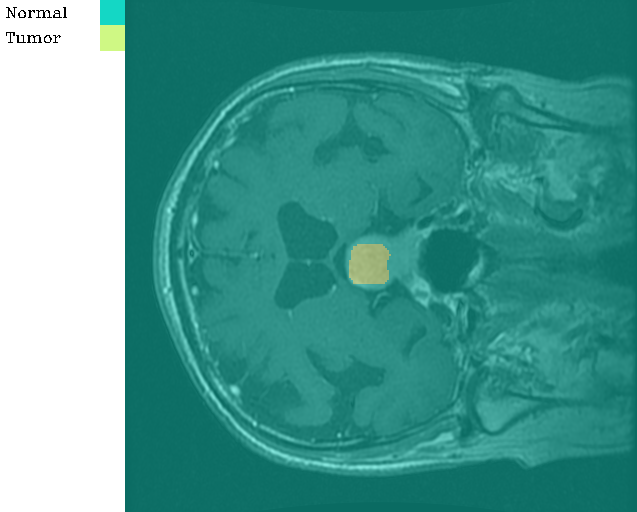

In [ ]:
from IPython.display import Image
# Image('/content/drive/MyDrive/out.png')

In [ ]:
#model.save('/content/drive/MyDrive/segmentation_weights.h5')

## Misc: Moving Files in Directory

In [ ]:
import os
import shutil
def moveFiles():
  for i in range(0,200,2):
    try:        
      shutil.move("/content/drive/MyDrive/Segmentation/Images/"+str(i)+".png", "/content/drive/MyDrive/Segmentation/Validation/"+str(i)+".png")
      shutil.move("/content/drive/MyDrive/Segmentation/ImagesLabels/"+str(i)+".png", "/content/drive/MyDrive/Segmentation/ValidationLabels/"+str(i)+".png")
      print(i)
    except:
      continue

  for i in range(201,2500,5):
    try:
      shutil.move("/content/drive/MyDrive/Segmentation/Images/"+str(i)+".png", "/content/drive/MyDrive/Segmentation/Validation/"+str(i)+".png")
      shutil.move("/content/drive/MyDrive/Segmentation/ImagesLabels/"+str(i)+".png", "/content/drive/MyDrive/Segmentation/ValidationLabels"+str(i)+".png")
      print(i)
    except:
      continue

## Misc: Counting Files in Directory

In [ ]:
DIR = '/content/drive/MyDrive/Segmentation/Images/'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1704


## Creating Model

In [ ]:
from keras_segmentation.models.segnet import resnet50_segnet 
#model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )
model1 = resnet50_segnet(n_classes=2 ,  input_height=512, input_width=512)
model1.summary()
model1.layers

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, 518, 518, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        zero_padding2d_18[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

## Training Model

In [ ]:
model1.train(
    train_images =  "/content/drive/MyDrive/Segmentation/Images",
    train_annotations = "/content/drive/MyDrive/Segmentation/ImagesLabels",
    val_images = "/content/drive/MyDrive/Segmentation/Validation",
    val_annotations = "/content/drive/MyDrive/Segmentation/ValidationLabels",
    checkpoints_path = "/content/drive/MyDrive/Segmentation" , epochs=20  
)

Verifying training dataset


100%|██████████| 1704/1704 [33:43<00:00,  1.19s/it]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 86s 98ms/step - loss: 0.2727 - accuracy: 0.9255

Epoch 00001: saving model to /content/drive/MyDrive/Segmentation.00001
Epoch 2/10
512/512 [==============================] - 50s 98ms/step - loss: 0.0411 - accuracy: 0.9875

Epoch 00002: saving model to /content/drive/MyDrive/Segmentation.00002
Epoch 3/10
512/512 [==============================] - 50s 98ms/step - loss: 0.0369 - accuracy: 0.9876

Epoch 00003: saving model to /content/drive/MyDrive/Segmentation.00003
Epoch 4/10
512/512 [==============================] - 50s 98ms/step - loss: 0.0331 - accuracy: 0.9892

Epoch 00004: saving model to /content/drive/MyDrive/Segmentation.00004
Epoch 5/10
512/512 [==============================] - 50s 98ms/step - loss: 0.0270 - accuracy: 0.9908

Epoch 00005: saving model to /content/drive/MyDrive/Segmentation.00005
Epoch 6/10
512/512 [==============================] - 50s 98ms/step - loss: 0.0279 - accuracy: 0.9903

Epoch 00

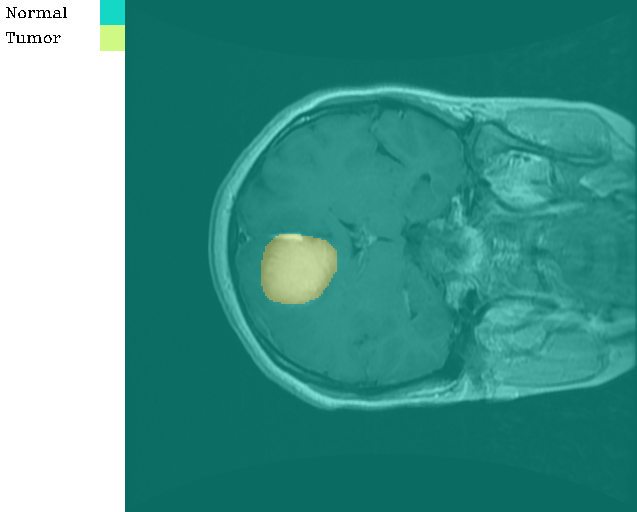

In [ ]:
o = model1.predict_segmentation(
    inp="/content/drive/MyDrive/Segmentation/Test/221.png",
    out_fname="/content/drive/MyDrive/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Normal" , "Tumor"]
)

from IPython.display import Image
Image('/content/drive/MyDrive/out.png')

## Evaluating Model

In [ ]:
print(model1.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/Segmentation/Test"  , annotations_dir="/content/drive/MyDrive/Segmentation/TestLabels" ) )


954it [20:11,  1.27s/it]

{'frequency_weighted_IU': 0.9826256919988852, 'mean_IU': 0.7620240588579197, 'class_wise_IU': array([0.99035785, 0.53369026])}


In [ ]:
#moveFiles()

## Misc: Getting files in Directory

In [ ]:
DIR = '/content/drive/MyDrive/Segmentation/Validation/'
import os
files = os.listdir(DIR)

## Misc: Moving Files

In [ ]:
# for k in range(len(files)):
#     i = (int(files[k].split('.')[0]))
#     if i < 767:
#       path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
#     elif i < 1533:
#       path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
#     elif i < 2299:
#       path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
#     else:
#       path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

#     f = h5py.File(path+str(i)+'.mat','r')
#     gr = f.get('cjdata')
#     norm_image1 = np.array(gr.get('tumorMask'))
#     if(norm_image1.shape != (512,512)):
#       norm_image1 = cv2.resize(norm_image1, (512,512), interpolation = cv2.INTER_AREA)
#     im1 = Image.fromarray(norm_image1)
#     savepath1 = '/content/drive/MyDrive/Segmentation/ValidationLabels/'
#     im1.save(savepath1+str(i)+".png", format="png")
#     print(i)


## Misc: Trying to run Terminal

In [ ]:
from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os

def shell(command):
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])
  return JSON([getoutput(command)])
output.register_callback('shell', shell)

In [ ]:
#@title Colab Shell (need to be run)
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
  $('#term_demo').terminal(async function(command) {
      if (command !== '') {
          try {
              let res = await google.colab.kernel.invokeFunction('shell', [command])
              let out = res.data['application/json'][0]
              this.echo(new String(out))
          } catch(e) {
              this.error(new String(e));
          }
      } else {
          this.echo('');
      }
  }, {
      greetings: 'Welcome to Colab Shell',
      name: 'colab_demo',
      height: 250,
      prompt: 'colab > '
  });
